Assign 1.

Implement k-means clustering as a function

In [7]:
from __future__ import division  # always use float division
import numpy as np
from scipy.spatial.distance import cdist  # fast distance matrices
from scipy.cluster.hierarchy import dendrogram  # you can use this
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # for when you create your own dendrogram

In [31]:
def kmeans(X, k, max_iter=100):
    """ Performs k-means clustering

    Input:
    X: (d x n) data matrix with each datapoint in one column
    k: number of clusters
    max_iter: maximum number of iterations

    Output:
    mu: (d x k) matrix with each cluster center in one column
    r: assignment vector
    """
    centroids = X[np.random.choice(range(X.shape[0]), k, replace=False)]

    labels = None
    loss = 0

    for _ in range(max_iter):

        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        loss = np.sum(np.min(distances, axis=1))

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels, loss

## Assignment 3.
`kmloss` is a lenght k vector, which contains the loss function value after each agglomeration step.

`mergeidx` is a (k − 1) × 2 matrix, which contains the indices of the two clusters that were merged at each step. The index of the new (joint) cluster is the highest index plus one.


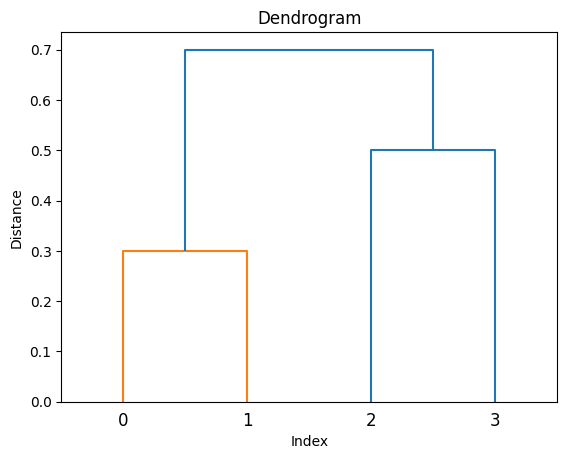

In [28]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

def agglo_dendro(kmloss, mergeidx):
    idx = np.array(mergeidx)
    loss = np.array(kmloss[1:])  # Extract loss values
    after_idx = np.max(mergeidx, axis=1) + 1

    # Combine indices, loss values, and newly formed cluster indices
    matrix_with_column = np.column_stack((idx, loss.T, after_idx))

    # Plot the dendrogram
    plt.figure()
    dn = hierarchy.dendrogram(matrix_with_column)
    plt.title('Dendrogram')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()


kmloss = [0.1, 0.3, 0.5, 0.7]  # Example loss values
mergeidx = [(0, 1), (2, 3), (4, 5)]  # Example merge indices
agglo_dendro(kmloss, mergeidx)




## Assignment 4.
Write a function that computes the probability density function for a multivariate Gaussian distribution

$y = norm_pdf(X, mu, C)$

Input:
1. `X` is a n × d matrix of datapoints, 
2. `mu` is a vector with d length, which is the center of the Gaussians distribution 
3. `C` is the covariance matrix of the Gaussian distribution as a d × d matrix. 

Output:
the probability density function evaluated at all points in X as a length n vector:

In [30]:

def norm_pdf(X, mu, C):
    d = X.shape[1]
    
    # Compute the determinant and the inverse of the covariance matrix
    det_C = np.linalg.det(C)
    inv_C = np.linalg.inv(C)
    
    # compute coefficient
    coeff = 1 / (np.sqrt((2 * np.pi) ** d * det_C))
    
    # compute X_i - mu
    diff = X - mu
    
    # Compute the exponent term for each data point
    exponent = -0.5 * np.sum(diff @ inv_C * diff, axis=1)
    
    # Compute the PDF values
    pdf_values = coeff * np.exp(exponent)
    
    return pdf_values

X = np.array([[1, 2], [2, 3], [3, 4]])
mu = np.array([2, 3])
C = np.array([[1, 0], [0, 1]])

# Calculate the PDF at all points in X
pdf_values = norm_pdf(X, mu, C)
pdf_values

array([0.05854983, 0.15915494, 0.05854983])

## Assignment 9.
Analyse the *2gaussians* dataset with k-means and GMM. 
1. Compare the cluster centers. Which algorithm works better and why?
2. How does the GMM depend on the initialisation?

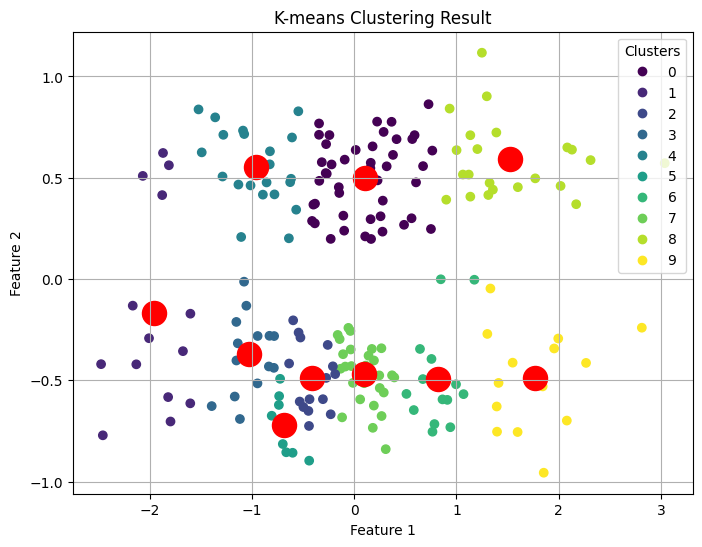

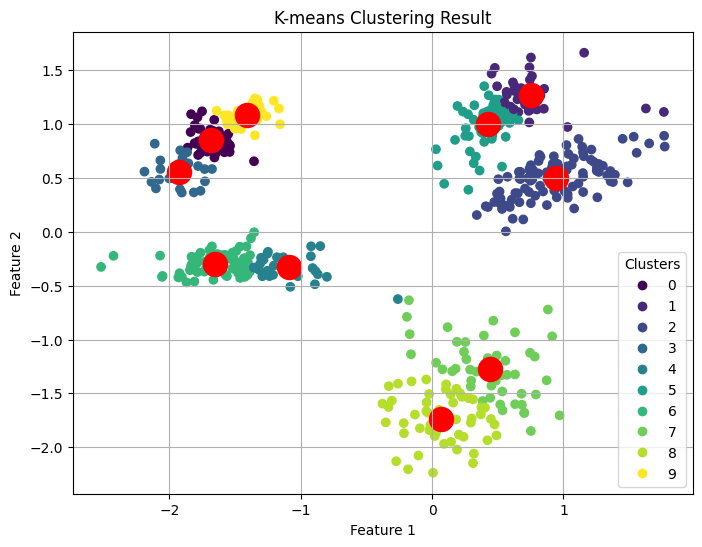

In [55]:
g2 = np.load('/Users/yue/tub/Lab-ML/problem_set2/data/2_gaussians.npy')
g5 = np.load('/Users/yue/tub/Lab-ML/problem_set2/data/5_gaussians.npy')

centroids2, labels2, loss2 = kmeans(g2.T, k=10)
centroids5, labels5, loss5 = kmeans(g5.T, k=10)

def plot_kmeans(X, labels, centroids):
    plt.figure(figsize=(8, 6))
    
    # Create a scatter plot of all data points colored by their cluster label
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='o', label='Centroids')
    
    # Create a legend
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.title('K-means Clustering Result')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)
    plt.show()

# Call the plotting function
plot_kmeans(g2.T, labels2, centroids2)

plot_kmeans(g5.T, labels5, centroids5)